<a href="https://colab.research.google.com/github/codebjjung/DATA_ANALYSIS/blob/main/KNN_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
from google.colab import drive
drive.mount("/content/gdrive/")

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [42]:
cd /content/gdrive/MyDrive/Colab Notebooks/open/

/content/gdrive/MyDrive/Colab Notebooks/open


[14.588008774332426, 10.732660434393699, 3.4842502780368685, 10.113851887386923, 4.348562981031773, 0.8660254037844386, 26.826106687329787, 2.2715633383201106, 6.89855057240287, 1.8681541692269414, 9.736015612148536, 31.94385699942949]
[5 9 7]
[170, 170, 160]
[6.38827050147378, 9.756536270623917, 22.880996481796853, 29.70336681253491, 16.084464554345605, 19.691368667515217, 46.90031982833379, 21.66010156947562, 26.600563903797223, 19.816407343411168, 10.714009520249641, 12.345444503945581]
[ 0  1 10]
[180, 180, 170]
[20.688402548287765, 16.875722206767918, 4.953786430600337, 5.6471231613982, 10.68222823197482, 7.262919523166975, 21.005713508471924, 5.28772162656091, 1.4798648586948717, 7.286288492778746, 15.993436153622525, 37.99486807451765]
[8 2 7]
[160, 170, 160]


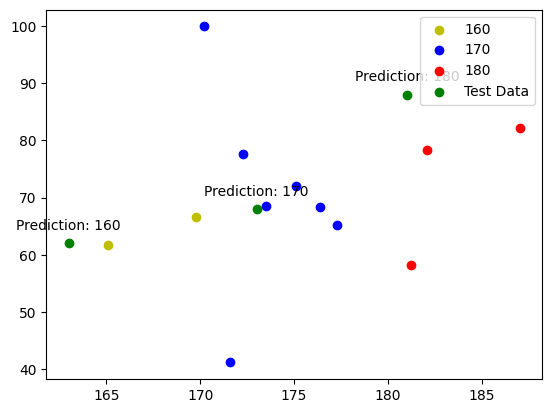

In [60]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):

        # X_train과 X의 거리 계산
        distances = []
        for x_train in self.X_train:
          distance = 0
          for i in range(len(x)):
            distance += (x[i] - x_train[i])**2
            distance = distance**0.5
          distances.append(distance)

        # 그중에서 k개의 거리만 배열
        k_indices = np.argsort(distances)[:self.k]

        print(distances)
        print(k_indices)


        # 배열 중에서 y_train
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        print(k_nearest_labels)

        # 가장 빈도가 높은 그룹에 배정
        most_common = np.bincount(k_nearest_labels).argmax()
        #print(most_common)
        return most_common

data = pd.read_excel("random.xlsx")
# 가상의 데이터 생성
X_train = data[['Height','Weight']].values
y_train = data['Group'].values
X_test = np.array([[173,68], [181, 88], [163,62]])

# KNN 모델 생성 및 훈련
knn = KNN(k=3)
knn.fit(X_train, y_train)

# 테스트 데이터 예측
predictions = knn.predict(X_test)

# 결과 시각화
plt.scatter(X_train[y_train == 160][:, 0], X_train[y_train == 160][:, 1], color='y', label='160')
plt.scatter(X_train[y_train == 170][:, 0], X_train[y_train == 170][:, 1], color='b', label='170')
plt.scatter(X_train[y_train == 180][:, 0], X_train[y_train == 180][:, 1], color='r', label='180')
plt.scatter(X_test[:, 0], X_test[:, 1], color='g', label='Test Data')

for i, pred in enumerate(predictions):
    plt.annotate(f'Prediction: {pred}', (X_test[i, 0], X_test[i, 1]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.legend()
plt.show()